## Resumen

Este trabajo esta enfocado en descubrir si hay o no una relevancia significativa, medible y predecible, entre los rindes de distintas cosechas y la cantidad de agua obtenida de precipitación natural en el periodo en que la semilla estuvo en suelo desde su plantado hasta su cosechado. Para esto se hará foco en distintos modelos de regresión.

## Objetivos
	-Intentar predecir el rinde que se va a obtener dependiendo de las precipitaciones que tuvo el cultivo
	-Encontrar el mejor modelo de regresión que se adecue a la problemática e implementarlo de la manera más eficaz, al mismo tiempo entender porque no funcionan los otros modelos.
	-En caso de no encontrar una variable predecible al finalizar el trabajo, evaluar que datos nos harían falta para poder acercarnos a dicho objetivo.
	-Implementar los conocimientos adquiridos durante el curso en la obtención, exploración, manejo y limpieza de los datos.

## Marco
Para obtener resultados comprobables se partió de dos datasets divididos en dos regiones de la Provincia de Buenos Aires, un par de la zona sur y otro de la zona norte dado que las dos presentan diferencias significativas en la cantidad de rinde promedio en los distintos cultivos.
Los datasets en cuestión se enfocan uno en tipo de cultivos y rindes obtenidos por región y otro en cuestiones climáticas de las mismas regiones.
Se exploraran distintos tipos de cultivos durante varios años en ambas regiones (siempre utilizando los mismos tipos de cultivos) abarcando el periodo de 1989 hasta 2021 inclusive.
Ambos datasets fueron provistos por Agencias Gubernamentales dedicadas exclusivamente a relevar las áreas de interés exclusivamente así que se consideran de alta confiabilidad.
Se dejan afuera aspectos como tipo de suelo, agroquímicos utilizados, tecnología utilizada (desde la maquinaria hasta los distintos tipo de semilla) y efectos de la temperatura con el fin de intentar obtener la correlación más pura entre precipitaciones y rindes.

## Metodología
-Explorar los datos, elegir los cultivos relevantes de cada región y entender los periodos de tiempo que estos tienen en suelo para cada tipo de semilla.
-Limpiar los datasets de datos no válidos, y de ser necesarios rellenar con valores adecuados para completarlos, de no ser posible eliminar el dato en cuestión.
-Filtrar los  datasets de datos que no sean relevantes para ambas regiones y de cultivos no significativos
-Ajustar el dataset de datos climáticos a cada uno de los periodos relevantes para cada cultivo dado que no todos tienen el mismo periodo de siembra y cosechado.
-Unir ambos datasets (Producción y Clima) para obtener  un solo dataset para poder trabajar.
-Analizar los datos como un todo, utilizando técnicas de visualización para ayudarnos a ver como se comporta los datos interactuando entre ellos para determinar nuestras variables de interés.
-Aplicar distintas técnicas de regresión, utilizando distinto juegos de variables para poder ver su interacción y resultado.

## Herramienta utilizadas
-Librerias de python: Pandas, Numpy, Matplotlib, Seaborn, Sklearn
-Excel

## Datos
El primero dataset provisto por el Servicio Meteorologíco de la Republica Argentina y el segundo dataset proviene de la Subsecretaria de Agricultura, Dirección Nacional de Agricultura, Dirección de Estimaciones Agrícolas. En los siguiente link se pueden solicitar los dataset https://datosestimaciones.magyp.gob.ar/reportes.php?reporte=Estimaciones 
https://www.argentina.gob.ar/smn/institucional/contacto.

## Diccionario de Variables

A continuación se brinda el listado de variables utilizadas en el proyecto: 
-Estimaciones (Provincia de BsAs 1987-2022.csv) 
°Cultivo: Tipos de cultivos 
°Campaña: Periodo de tiempo de duración del rendimiento 
°Provincia: División administrativa en que se organiza el Estado 
°Departamento: Los Departamentos y partidos son las subdivisiones de segundo orden de una provincia 
°idprovincia: número asignado a cada Provincia 
°iddepartamento: número asignado a cada Departamento 
°Sup.Sembrada: Superficie en héctarea sembrada 
°Sup.Cosechada: Superficie en héctarea cosechada 
°Producción: Toneladas de producción 
°Rendimiento: El rendimiento se expresa kg/héctarea

-192602 TRES ARROYOS 1988-2022.xlsx / 192602 JUNIN AERO 1988-2022.xlsx 
°Fecha: dd/mm/aaaa 
°Temperatura máxima: mediciones en centrigrados
°Temperatura media: mediciones en centrigrados
°Temperatura minima: mediciones en centrigrados 
°Precipitación: mediciones en milimetros

## Conformación del equipo
-Diego Ruiz 
-Gianluca Amoroso 
-Bruno Rossi
-Matias Basso
-Francisco Pucci 
-Juan Novo





In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


import sqlalchemy as db
import sqlite3 
import datetime


In [4]:
df_datos_totales=pd.read_excel("Datos_totales.xlsx")
df_datos_totales

,Unnamed: 0,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
0,0,101,210,35,35,56,1600,2021,257.7
1,1,101,462,50,50,70,1400,1988,199.6
2,2,101,462,50,50,40,800,1989,180.5
3,3,101,469,150,130,190,1462,1988,199.6
4,4,101,469,120,120,168,1400,1989,180.5
...,...,...,...,...,...,...,...,...,...
3379,1925,129,833,105070,105070,514843,4900,2017,419.1
3380,1926,129,833,89875,80875,339453,4197,2018,440.8
3381,1927,129,833,119000,119000,393100,3303,2019,395.4
3382,1928,129,833,131000,131000,570000,4351,2020,503.3


In [5]:
df_datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3384 non-null   int64  
 1   Cultivo         3384 non-null   int64  
 2   idDepartamento  3384 non-null   int64  
 3   Sup_Sembrada    3384 non-null   int64  
 4   Sup_Cosechada   3384 non-null   int64  
 5   Producción      3384 non-null   int64  
 6   Rendimiento     3384 non-null   int64  
 7   anio            3384 non-null   int64  
 8   Precipitacion   3384 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 238.1 KB


In [6]:
df_datos_totales.describe()

,Unnamed: 0,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.00000,3384.000000
mean,862.238771,115.909574,417.029551,23898.095154,22276.288121,68289.342199,2971.283688,2005.80792,512.867524
std,516.422831,10.153570,262.042090,35967.720110,35537.353342,111853.381132,1936.930244,9.55206,244.432019
min,0.000000,101.000000,14.000000,15.000000,0.000000,0.000000,0.000000,1988.00000,116.000000
25%,422.750000,105.000000,196.000000,1900.000000,1000.000000,2420.000000,1704.000000,1998.00000,335.500000
50%,845.500000,116.000000,448.000000,10000.000000,6860.000000,16830.000000,2500.000000,2006.00000,450.500000
75%,1268.250000,125.000000,686.000000,31000.000000,29100.000000,87155.750000,3800.000000,2014.00000,643.200000
max,1929.000000,129.000000,833.000000,265000.000000,265000.000000,884440.000000,13886.000000,2021.00000,1447.500000


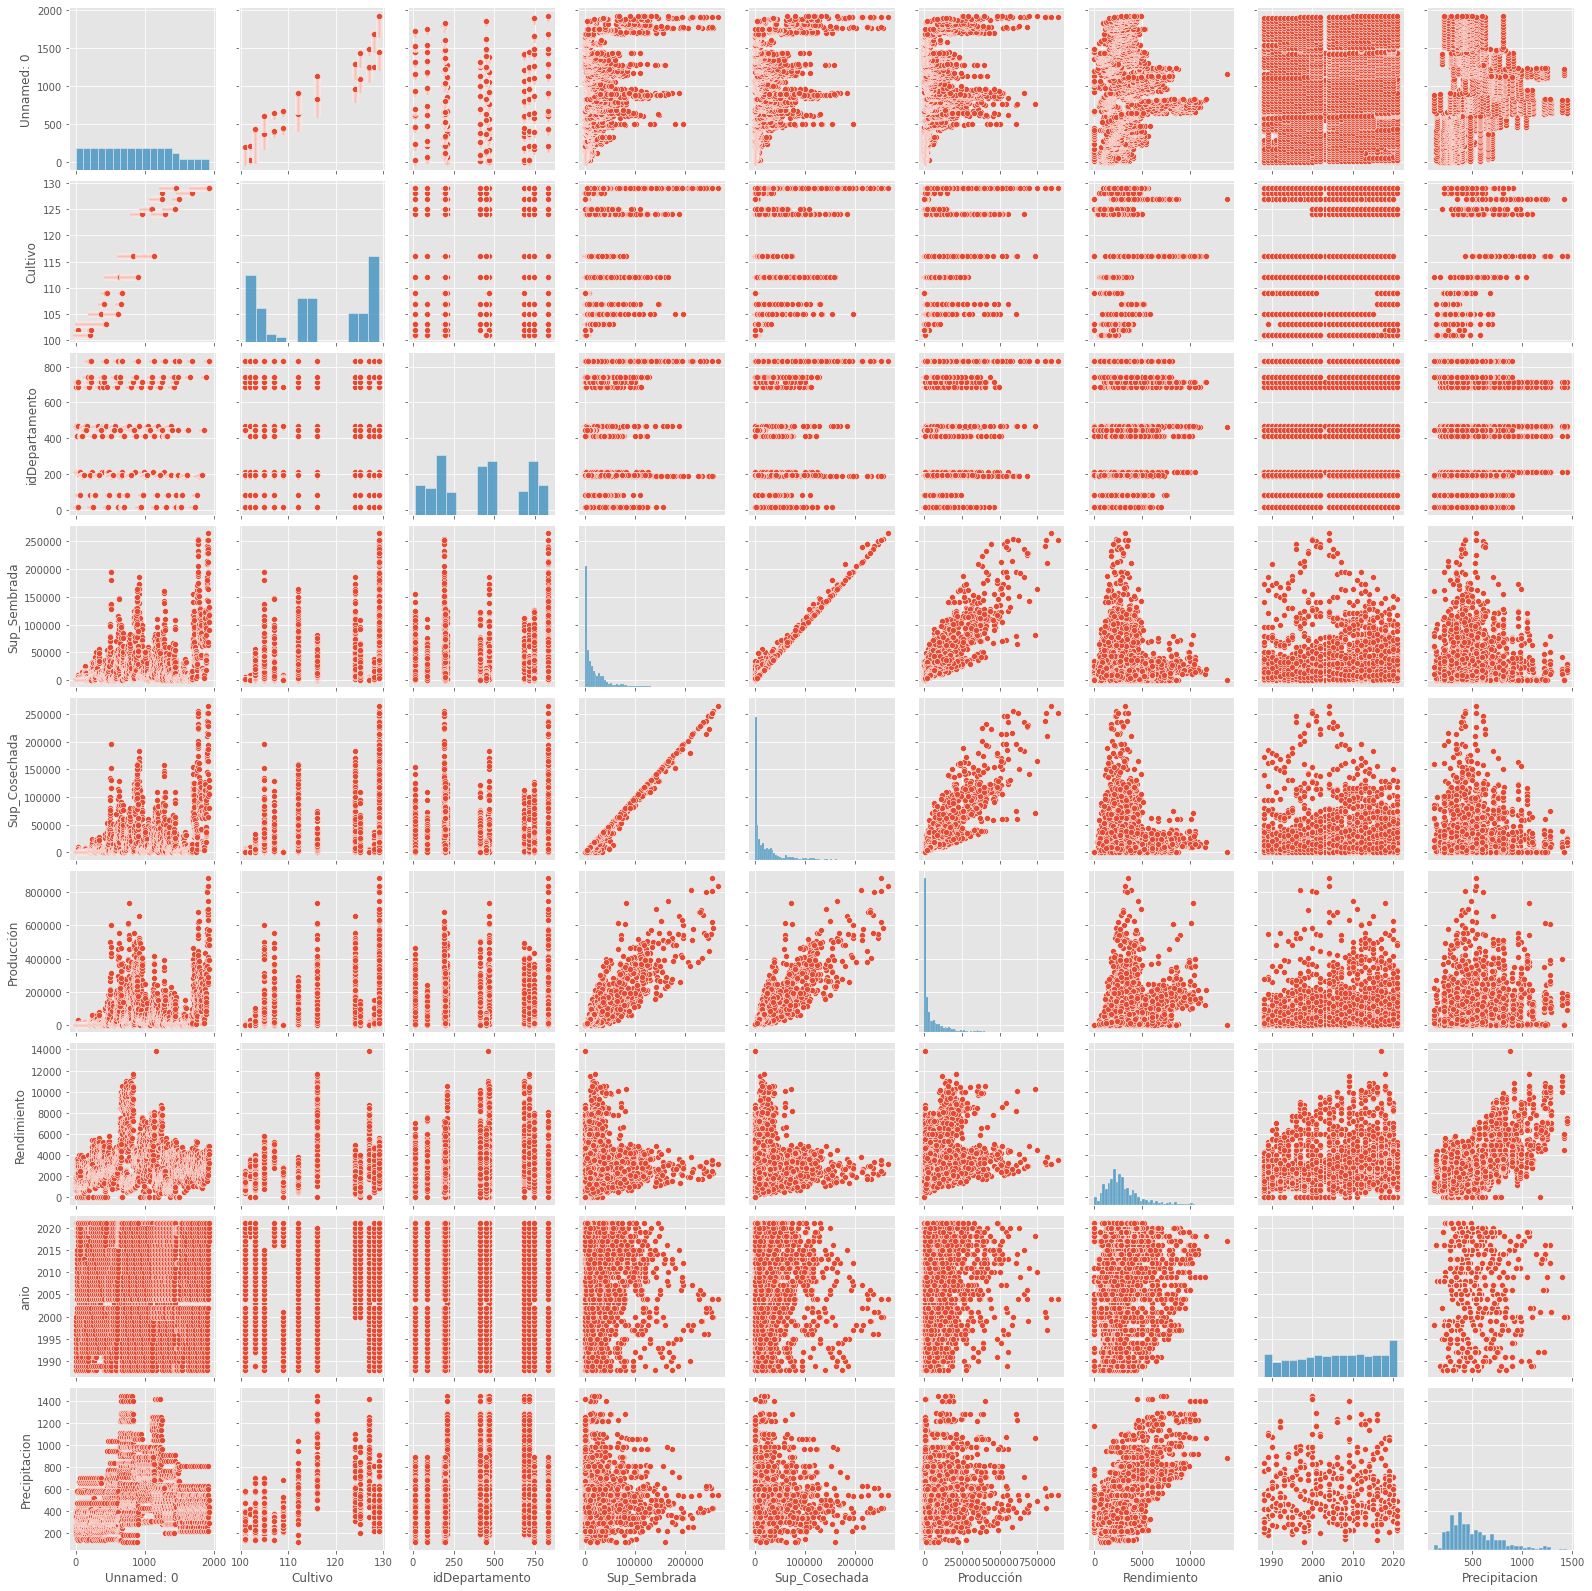

In [7]:
sns.pairplot(df_datos_totales)

In [8]:
df_datos_totales.corr()

,Unnamed: 0,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
Unnamed: 0,1.000000,0.939326,0.036544,0.380167,0.397161,0.328893,0.129642,0.057183,0.217335
Cultivo,0.939326,1.000000,0.014520,0.332574,0.355216,0.322867,0.195593,0.078295,0.359245
idDepartamento,0.036544,0.014520,1.000000,0.066248,0.074220,0.112705,0.150069,0.000981,0.101195
Sup_Sembrada,0.380167,0.332574,0.066248,1.000000,0.994505,0.877384,0.031219,0.063264,0.028945
Sup_Cosechada,0.397161,0.355216,0.074220,0.994505,1.000000,0.878675,0.030519,0.050175,0.035468
Producción,0.328893,0.322867,0.112705,0.877384,0.878675,1.000000,0.337646,0.127105,0.216163
Rendimiento,0.129642,0.195593,0.150069,0.031219,0.030519,0.337646,1.000000,0.205624,0.614372
anio,0.057183,0.078295,0.000981,0.063264,0.050175,0.127105,0.205624,1.000000,0.000046
Precipitacion,0.217335,0.359245,0.101195,0.028945,0.035468,0.216163,0.614372,0.000046,1.000000


<AxesSubplot:>

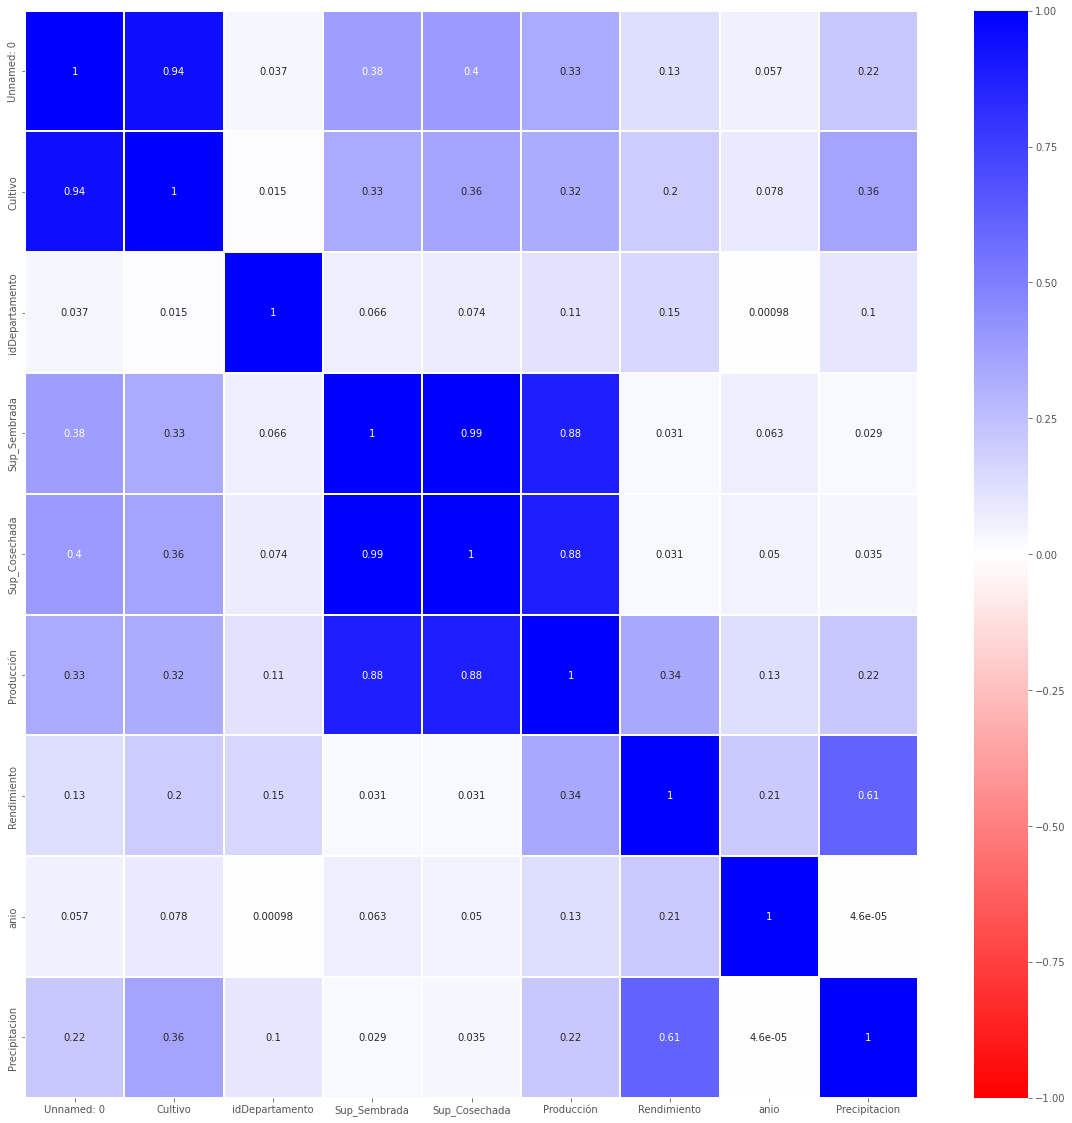

In [9]:
plt.figure(figsize=(20,20))

sns.heatmap(df_datos_totales.corr(),annot=True,vmin=-1,vmax=1,cmap="bwr_r",linewidths=.4)

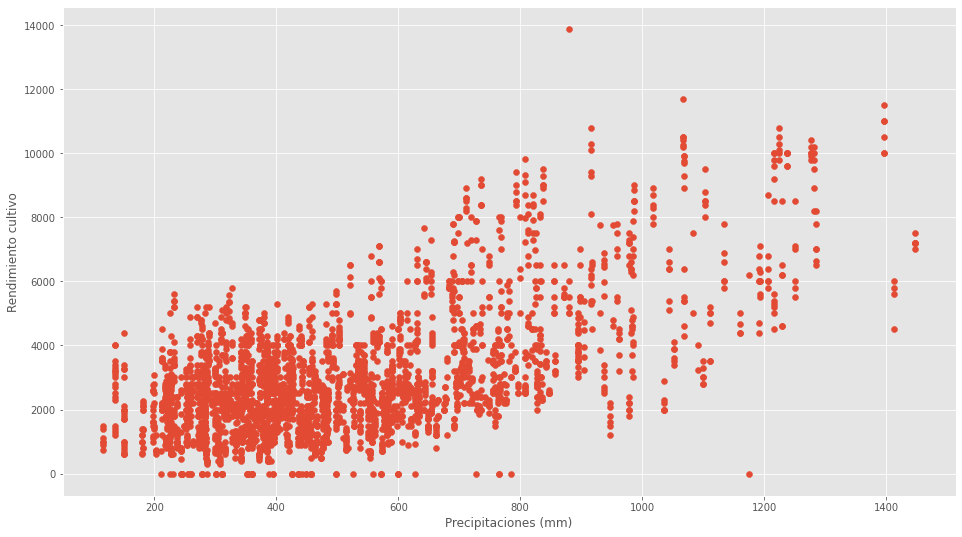

In [10]:
plt.scatter(df_datos_totales["Precipitacion"], df_datos_totales["Rendimiento"])
plt.xlabel("Precipitaciones (mm)")
plt.ylabel("Rendimiento cultivo")
plt.show()

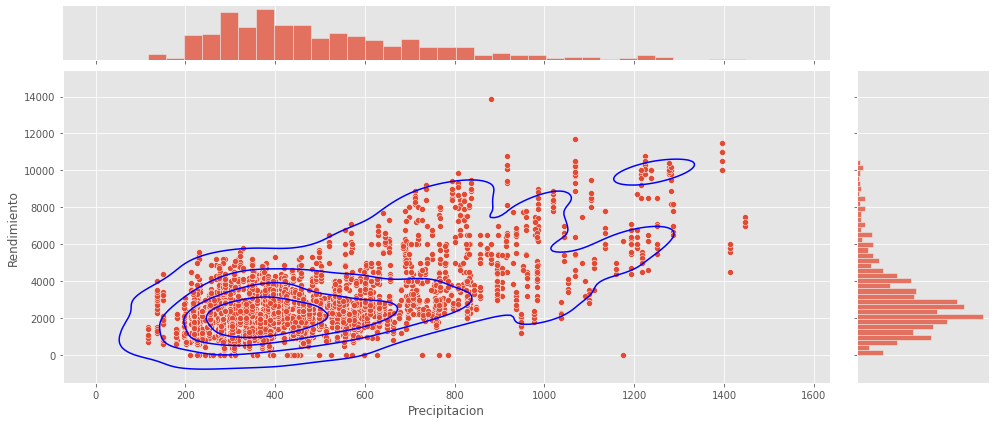

In [11]:
jointplot = sns.jointplot(data=df_datos_totales, x="Precipitacion", y ="Rendimiento")
jointplot.plot_joint(sns.kdeplot, color="b",levels=5)
jointplot.fig.set_figwidth(15)

In [12]:
X = df_datos_totales.drop("Rendimiento", axis=1)
y = df_datos_totales.Rendimiento

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#Recuperamos la intersección
print(regressor.intercept_)

-47413.78181072815


In [16]:
#La pendiente
print(regressor.coef_)

[ 1.08574528e+00 -5.05210479e+01  3.63750170e-01 -9.79588658e-03
 -3.73388969e-02  1.69114001e-02  2.65178406e+01  3.65491761e+00]


In [17]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([ 2498.97342167,  7313.60924015,  5959.55173185,  3495.03794356,
        1326.81487646,  1845.40131415,  2276.05992762,  6074.58683451,
        2655.06214812,  1546.74441714,  1918.9442727 ,  3450.07303866,
        3788.37810397,  2611.31013321,  4205.89012326,  3424.20166961,
        3582.00080461,  2087.04587144,  5329.62834824,  2009.03834306,
        2285.28543881,  3742.89970104,  3111.71591802,  4829.85082118,
        2611.62213119,  4065.10748805,  4284.04577349,  2263.57311212,
        1972.02579817,  7746.600227  ,  2184.13517278,  2831.4141805 ,
        4326.47836361,  1641.03070383,  2601.75171856,  4599.72471551,
        2007.37763595,  2510.99582058,  4477.08643702,  2618.3048099 ,
        2546.15303667,  3084.26562158,  7854.47990267,  2686.45133578,
        2592.36533899,  2163.62680124,  2066.53728757,  1777.30334836,
       11387.9977111 ,  1955.14490491,  2044.81213115,  2366.63451823,
        2501.26119407,  1784.03430483,  4111.57134503,   291.64338359,
      

In [18]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1296,3000,2498.973422
663,9800,7313.609240
648,7500,5959.551732
2713,2800,3495.037944
1678,1286,1326.814876
...,...,...
235,4900,2347.504284
2622,2500,2257.448993
1957,2100,514.955071
817,8000,6264.532788


In [19]:
# error cuadratico medio
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1432799.90


In [20]:
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Squared error: %2f' % mean_squared_error(y_test, y_pred))

Mean Squared error: 1432799.895094


In [21]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 913.9238579026661


In [22]:
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Variance score: 0.59


In [23]:
from math import sqrt
result = sqrt(mean_squared_error(y_test, y_pred))
result

1196.9961967752702

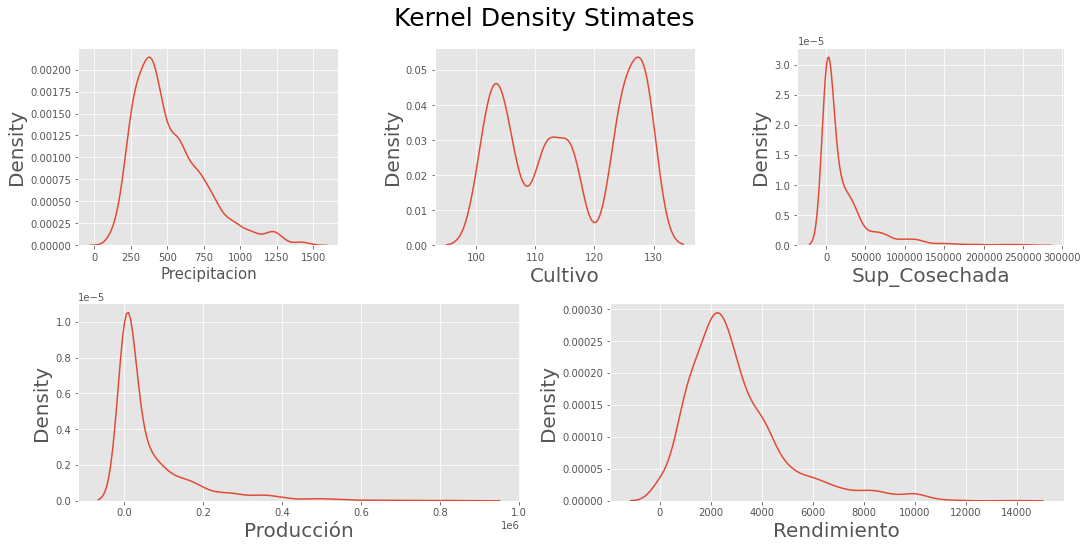

In [24]:
##Kernel Densiti stimates for the top
fig= plt.figure(figsize=(15,7.5), constrained_layout=True)
spec= fig.add_gridspec(2,6)
ax00= fig.add_subplot(spec[0, 0:2])
ax01= fig.add_subplot(spec[0, 2:4])
ax02= fig.add_subplot(spec[0, 4:6])
ax10= fig.add_subplot(spec[1, 0:3])
ax11= fig.add_subplot(spec[1, 3:6])

sns.kdeplot(data = df_datos_totales, x ='Precipitacion', ax=ax00)
ax00.set_xlabel("Precipitacion", fontsize=15)
ax00.set_ylabel("Density", fontsize=20)

sns.kdeplot(data = df_datos_totales, x ='Cultivo', ax=ax01)
ax01.set_xlabel("Cultivo", fontsize=20)
ax01.set_ylabel("Density", fontsize=20)

sns.kdeplot(data = df_datos_totales, x ='Sup_Cosechada', ax=ax02)
ax02.set_xlabel("Sup_Cosechada", fontsize=20)
ax02.set_ylabel("Density", fontsize=20)

sns.kdeplot(data = df_datos_totales, x ='Producción', ax=ax10)
ax10.set_xlabel("Producción", fontsize=20)
ax10.set_ylabel("Density", fontsize=20)

sns.kdeplot(data = df_datos_totales, x ='Rendimiento', ax=ax11)
ax11.set_xlabel("Rendimiento", fontsize=20)
ax11.set_ylabel("Density", fontsize=20)

fig.suptitle('Kernel Density Stimates', fontsize=25)
plt.show()

In [25]:
##Se procedio a entrenar el modelo con tres variables de interes a fin de mejorar el r2
X_top = X[['Producción', 'Sup_Cosechada', 'Precipitacion']]

In [26]:
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=1)

In [27]:
model_2 = LinearRegression()
model_2.fit(X_train_top, y_train_top)

LinearRegression()

In [28]:
yhat_top = model_2.predict(X_test_top)

In [29]:
import sklearn.metrics as metrics
r2_2 = metrics.r2_score(y_test_top, yhat_top)
print('R Squared: %.3f' % r2_2)

R Squared: 0.530


In [30]:
##Transforming the independent variables (se utiliza un algoritmo de transformación 
## porque el r2 usando más variables no fue satisfactorio)

In [31]:
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')

In [32]:
X_trans = X_top.copy(deep=True)
X_trans = power_transformer.fit_transform(X_trans)

In [33]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y, test_size=0.2, random_state=1)

In [34]:
model_3 = LinearRegression()
model_3.fit(X_train_trans, y_train_trans)

LinearRegression()

In [35]:
yhat_trans = model_3.predict(X_test_trans)

In [36]:
r2_3 = metrics.r2_score(y_test_trans, yhat_trans)
print('R Square: %3f' % r2_3)

R Square: 0.871705


In [37]:
## Se consiguio mejorar el R2 del 0,53 al 0,87.  
## sacar rmse y rae